In [224]:
import pandas as pd
import numpy as np

In [225]:
car_price= pd.read_csv('/content/Ford Car Price Prediction.csv')
car_price.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0


In [226]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17957 non-null  float64
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [227]:
car_price.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
17961,False,False,False,False,False,False,False,False,False
17962,False,False,False,False,False,False,False,False,False
17963,False,False,False,False,False,False,False,False,False
17964,False,False,False,False,False,False,False,False,False


task1----Removing null values

In [228]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='median')

impute.fit(car_price[['tax']])

car_price['tax'] = impute.transform(car_price[['tax']])

In [229]:
car_price.isnull()
car_price.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


task2 ---- Removing duplicate rows


In [230]:
car_price.drop_duplicates(subset=None, keep='first', inplace=True)

In [231]:
car_price.duplicated().sum()

0

task-3 ----- Handaling categorical variables

In [232]:
car_price['model'].unique()
car_price = pd.get_dummies(car_price,columns=['model'],dtype='int')
car_price['transmission'].unique()
car_price = pd.get_dummies(car_price,columns=['transmission'],dtype='int')
car_price['fuelType'].unique()
car_price = pd.get_dummies(car_price,columns=['fuelType'],dtype='int')

In [233]:
car_price.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,145.0,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,145.0,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,145.0,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145.0,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145.0,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [234]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17812 non-null  int64  
 1   price                         17812 non-null  int64  
 2   mileage                       17812 non-null  int64  
 3   tax                           17812 non-null  float64
 4   mpg                           17812 non-null  float64
 5   engineSize                    17812 non-null  float64
 6   model_ B-MAX                  17812 non-null  int64  
 7   model_ C-MAX                  17812 non-null  int64  
 8   model_ EcoSport               17812 non-null  int64  
 9   model_ Edge                   17812 non-null  int64  
 10  model_ Escort                 17812 non-null  int64  
 11  model_ Fiesta                 17812 non-null  int64  
 12  model_ Focus                  17812 non-null  int64  
 13  model_

task4--- Feature selection

In [235]:
car_price_corr=car_price.corr()
car_price_corr

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
year,1.000000,0.635715,-0.708690,0.297182,-0.021702,-0.137582,-0.094983,-0.078755,0.084409,0.024422,...,-0.010452,-0.006801,0.036475,-0.037490,0.013433,-0.088940,-0.004454,0.024170,-0.006801,0.087231
price,0.635715,1.000000,-0.530483,0.405969,-0.346263,0.411451,-0.119506,-0.088128,0.010959,0.237867,...,0.000285,-0.006282,0.207964,-0.258201,0.140648,0.199033,0.007759,0.073356,0.002421,-0.204534
mileage,-0.708690,-0.530483,1.000000,-0.257538,0.117697,0.214692,0.035588,0.046377,-0.091369,-0.007716,...,-0.001499,-0.007090,-0.049923,0.058845,-0.029242,0.257338,-0.003502,-0.001411,-0.001509,-0.256832
tax,0.297182,0.405969,-0.257538,1.000000,-0.502347,0.185370,-0.051221,-0.118535,0.096340,0.075651,...,0.014699,-0.011030,0.154962,-0.181929,0.089719,-0.128530,-0.019357,-0.007161,-0.013687,0.129579
mpg,-0.021702,-0.346263,0.117697,-0.502347,1.000000,-0.262239,-0.031376,0.027674,-0.123400,-0.124373,...,-0.011617,-0.000154,-0.234934,0.302342,-0.174245,0.292856,0.009822,0.107118,0.006945,-0.300907
engineSize,-0.137582,0.411451,0.214692,0.185370,-0.262239,1.000000,-0.010584,0.023169,-0.144822,0.161985,...,0.014713,-0.006074,0.164279,-0.225529,0.142181,0.640925,0.015908,0.054639,0.011249,-0.644836
model_ B-MAX,-0.094983,-0.119506,0.035588,-0.051221,-0.031376,-0.010584,1.000000,-0.025081,-0.036795,-0.015276,...,-0.001061,-0.001061,-0.003977,-0.049824,0.076227,-0.030446,-0.001500,-0.004979,-0.001061,0.030836
model_ C-MAX,-0.078755,-0.088128,0.046377,-0.118535,0.027674,0.023169,-0.025081,1.000000,-0.046042,-0.019116,...,-0.001327,-0.001327,0.005919,-0.005799,0.001769,0.101832,-0.001877,-0.006230,-0.001327,-0.101182
model_ EcoSport,0.084409,0.010959,-0.091369,0.096340,-0.123400,-0.144822,-0.036795,-0.046042,1.000000,-0.028044,...,-0.001947,-0.001947,-0.021467,0.002478,0.020319,-0.103801,-0.002754,-0.009139,-0.001947,0.104462
model_ Edge,0.024422,0.237867,-0.007716,0.075651,-0.124373,0.161985,-0.015276,-0.019116,-0.028044,1.000000,...,-0.000809,-0.000809,0.084243,-0.154978,0.129585,0.157170,-0.001143,-0.003795,-0.000809,-0.156664


<Axes: >

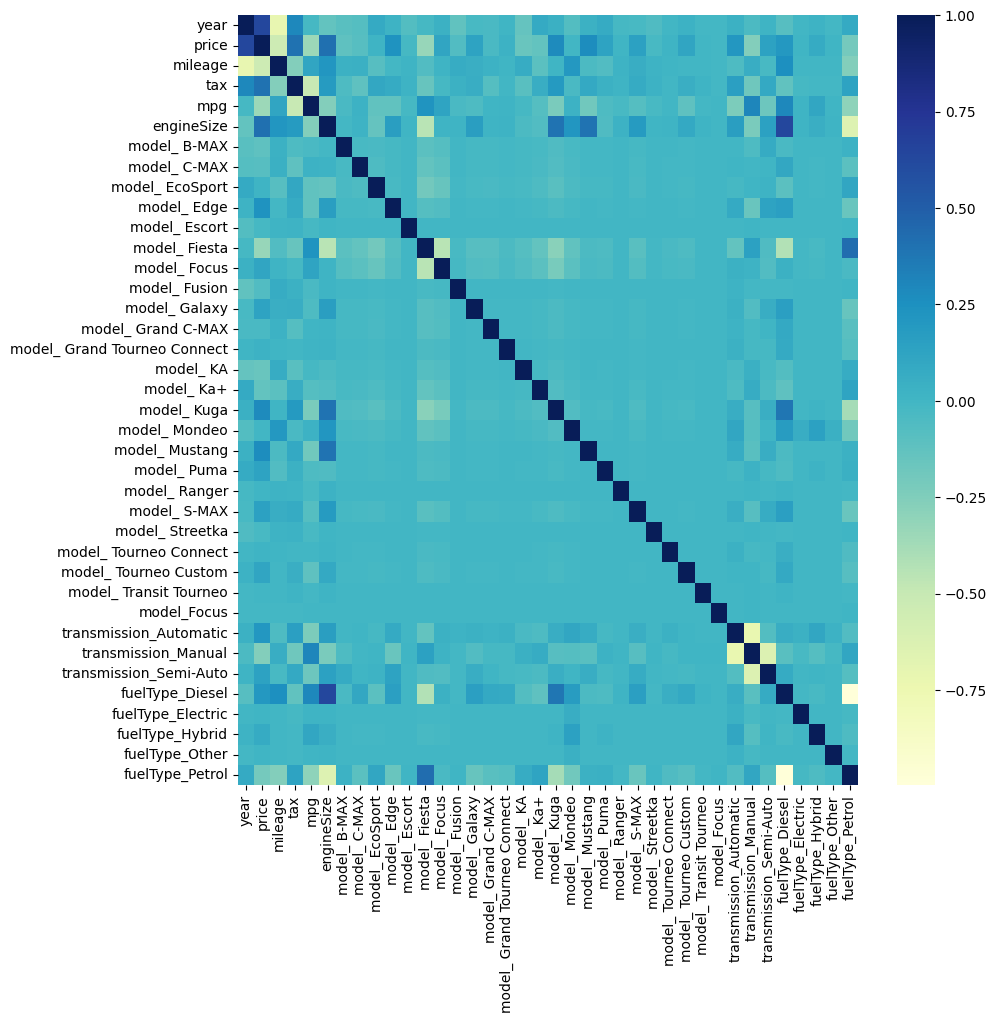

In [236]:
#Before removing variables
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
car_price_corr= car_price.corr()
sns.heatmap(car_price_corr, cmap = 'YlGnBu')

In [237]:
selected_corelation=car_price.drop(['price','year'],axis=1)

<Axes: >

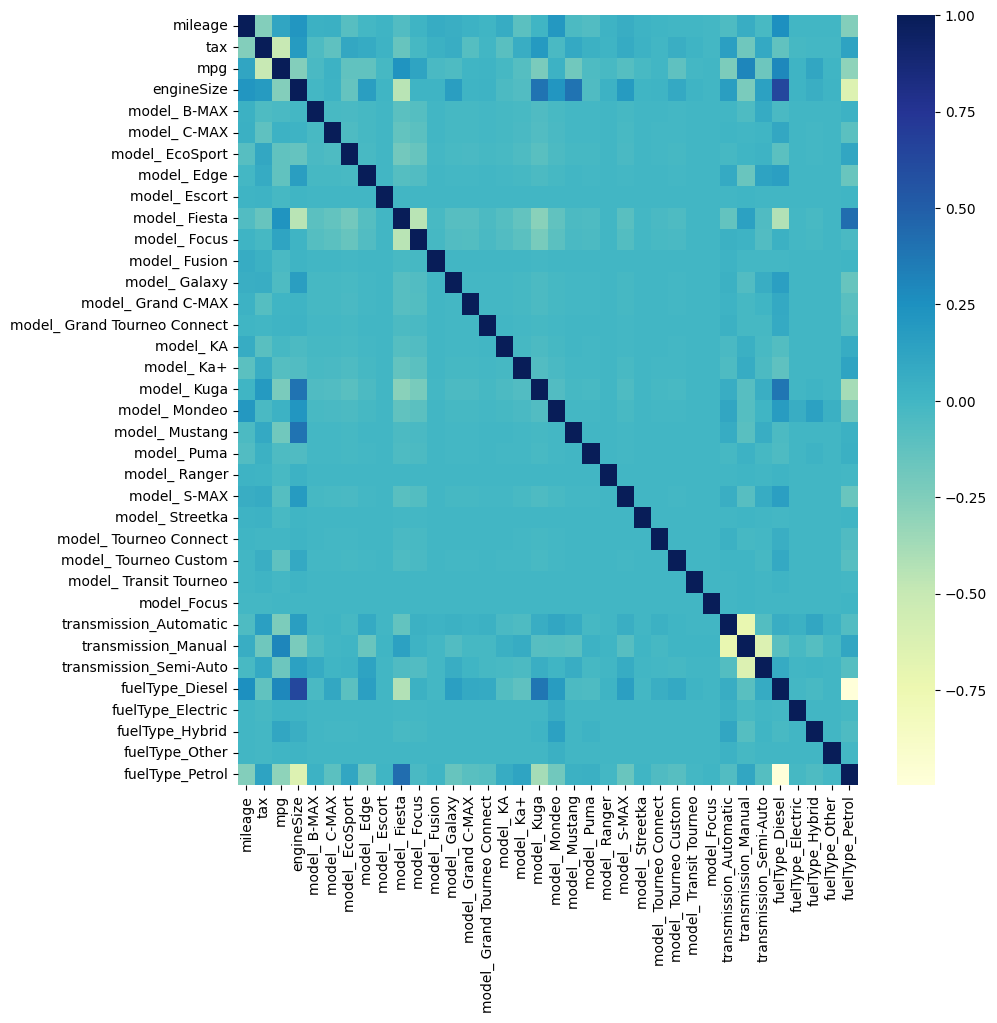

In [238]:
#after removing variables
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
selected_corelation= selected_corelation.corr()
sns.heatmap(selected_corelation, cmap = 'YlGnBu')

Task-5Feature Scaling

In [239]:
#accuracy before scaling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR=LinearRegression()
LR.fit(X_train, y_train)
y_prediction=LR.predict(X_test)
print("Test set accuracy: {:.2f}".format(r2_score(y_test,y_prediction)))

Test set accuracy: 0.84


In [240]:
#Accuracy after minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['price']
car_price[features] = scaler.fit_transform(car_price[features])
x=car_price.drop('price',axis=1)
y=car_price['price']
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)
LR.fit(X_train, y_train)
y_prediction=LR.predict(X_test)
print("Test set accuracy: {:.2f}".format(r2_score(y_test,y_prediction)))

Test set accuracy: 0.84


In [241]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
LR.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    LR.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.84
